In [ ]:
##Librerías
import math 
from math import e
from math import cos
from math import sin
import numpy as np
import pandas as pd
import sympy as sp
from sympy import *
from tabulate import tabulate
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [ ]:
##Sistema de ecuaciones
def func(x,y1,y2):
  return 9*y1+24*y2+5*cos(x)-(1/3)*sin(x)
def func2(x,y1,y2):
  return -24*y1-51*y2-9*cos(x)+(1/3)*sin(x)

In [ ]:
##Soluciones
def sol1(x):
  return 2*e**(-3*x)-e**(-39*x)+(1/3)*cos(x)
def sol2(x):
  return (-1)*e**(-3*x)+2*e**(-39*x)-(1/3)*cos(x)
def sol3(x,ep):
  return 1+x+(e**(x/ep)-1)/(e**(1/ep)-1)

In [ ]:
##Forward Euler
def FEuler(fun,fun2,sol1,sol2,a,b,y10,y20,M):
  h = (b-a)/M
  X = np.zeros(M+1)
  Y1 = np.zeros(M+1)
  Y2 = np.zeros(M+1)
  Error1= np.zeros(M+1)
  Error2= np.zeros(M+1)
  Y1[0] = y10
  Y2[0] = y20
  Error1[0]= 0
  Error2[0]= 0
  X[0] = a
  i = 1
  while i<=M:
    X[i] = X[i-1]+h
    Y1[i] = Y1[i-1] + h*func(X[i-1], Y1[i-1],Y2[i-1])
    Y2[i] = Y2[i-1] + h*func2(X[i-1], Y1[i-1],Y2[i-1])
    Error1[i]= abs(Y1[i]-sol1(X[i]))
    Error2[i]= abs(Y2[i]-sol2(X[i]))
    i = i +1 
  
  Datos=[]

  for i in range(M+1):
    Datos.append([X[i],Y1[i],Error1[i],Y2[i],Error2[i]])
  Datos = pd.DataFrame(Datos).set_axis(['x','Y1','Error Y1','Y2','Error Y2'], axis=1)
  return Datos

FEuler(func,func2,sol1,sol2, 0, 1, (4/3),(2/3), 4)

,x,Y1,Error Y1,Y2,Error Y2
0,0.00,1.333333,0.000000,0.666667,0.000000
1,0.25,9.583333,8.315688,-18.083333,17.288113
2,0.50,-76.163643,76.902431,152.819731,153.335388
3,0.75,670.443570,669.988875,-1340.584586,1340.235290
4,1.00,-5863.708103,5863.987778,11727.617964,11727.847852


In [ ]:
##Backward Euler 
t,y1,y2,y1j,y2j= symbols('t,y1,y2,y1j,y2j')
def BEuler(f1,f2,s1,s2,a,b,y10,y20,M):
  h = (b-a)/M
  X = np.zeros(M+1)
  Y1 = np.zeros(M+1)
  Y2 = np.zeros(M+1)
  Error1= np.zeros(M+1)
  Error2= np.zeros(M+1)
  Y1[0] = y10
  Y2[0] = y20
  Error1[0]= 0
  Error2[0]= 0
  X[0] = a

  f2x= y2j - y2 - h*f2(t,y1j,y2j)
  f2x= solve(f2x,y2j)[0]

  f1x= y1j - y1 - h*f1(t,y1j,y2j)
  f1x= solve(f1x.subs(y2j,f2x),y1j)[0]


  i=0
  while i<M:
    X[i+1]= X[i]+h
    Y1[i+1]= f1x.subs(t,X[i+1]).subs(y1,Y1[i]).subs(y2,Y2[i]) 
    Error1[i+1]= abs(Y1[i+1]-s1(X[i+1]))
    Y2[i+1]= f2x.subs(t,X[i+1]).subs(y1j,Y1[i+1]).subs(y2,Y2[i]) 
    Error2[i+1]= abs(Y2[i+1]-s2(X[i+1]))
    i=i+1

  Datos=[]

  for i in range(M+1):
    Datos.append([X[i],Y1[i],Error1[i],Y2[i],Error2[i]])
  Datos = pd.DataFrame(Datos).set_axis(['x','Y1','Error Y1','Y2','Error Y2'], axis=1)
  return Datos

BEuler(func,func2,sol1,sol2,0,1,(4/3),(2/3),8)

In [ ]:
##Crank-Nicolson
def CNicolson(f1,f2,s1,s2,a,b,y10,y20,M):
  h = (b-a)/M
  X, Y11, Y12= FEuler(f1,f2,s1,s2,a,b,y10,y20,M)
  X, Y21, Y22 = BEuler(f1,f2,s1,s2,a,b,y10,y20,M)
  Y1 = np.zeros(M+1)
  Y2 = np.zeros(M+1)
  Error1= np.zeros(M+1)
  Error2= np.zeros(M+1)
  Error1[0]=0
  Error2[0]=0
  Y1 = (1/2)*(Y11+Y21)
  Y2 = (1/2)*(Y12+Y22)


  for i in range(M):
    Error1[i]= Y1[i]-s1(X[i])
    Error2[i]= Y2[i]-s2(X[i])


  Datos=[]

  for i in range(M+1):
    Datos.append([X[i],Y1[i],s1(X[i]),Error1[i],Y2[i],s2(X[i]),Error2[i]])
  Datos = pd.DataFrame(Datos).set_axis(['x','Y1','Y1 real','Error Y1','Y2','Y2 real','Error Y2'], axis=1)

  return Datos
CNicolson(func,func2,sol1,sol2,0,1,(4/3),(2/3),8)

NameError: ignored

In [ ]:
#Runge-Kutta 45 orden 5
def RK45(fun1, fun2,a,b,y10,y20,M, order=5):
  X = np.zeros(M+1)
  Y1 = np.zeros(M+1)
  Y2 = np.zeros(M+1)
  
  h = (b-a)/M
  X[0] = a
  Y1[0] = y10
  Y2[0] = y20
  i = 1
  while i<=M:
    X[i] = X[i-1]+h
    i = i +1
  k = 0
    
  while k<M:
    k1 = h*fun1(X[k],Y1[k], Y2[k])
    l1 = h*fun2(X[k],Y1[k], Y2[k])
    k2 = h*fun1(X[k] + 1/4*h,Y1[k]+1/4*k1, Y2[k]+1/4*l1)
    l2 = h*fun2(X[k] + 1/4*h,Y1[k]+1/4*k1, Y2[k]+1/4*l1)
    k3 = h*fun1(X[k]+ 3/8*h,Y1[k]+3/32*k1+9/32*k2,Y2[k]+3/32*l1+9/32*l2)
    l3 = h*fun2(X[k]+ 3/8*h,Y1[k]+3/32*k1+9/32*k2,Y2[k]+3/32*l1+9/32*l2 )
    k4 = h*fun1(X[k]+ 12/13*h,Y1[k]+1932/2197*k1-7200/2197*k2+7296/2197*k3, Y2[k]+1932/2197*l1-7200/2197*l2+7296/2197*l3)
    l4 = h*fun2(X[k]+ 12/13*h,Y1[k]+1932/2197*k1-7200/2197*k2+7296/2197*k3, Y2[k]+1932/2197*l1-7200/2197*l2+7296/2197*l3)
    k5 = h*fun1(X[k]+ h,Y1[k]+439/216*k1-8*k2+3680/513*k3-845/4101*k4, Y2[k]+439/216*l1-8*l2+3680/513*l3-845/4101*l4)
    l5 = h*fun2(X[k]+ h,Y1[k]+439/216*k1-8*k2+3680/513*k3-845/4101*k4, Y2[k]+439/216*l1-8*l2+3680/513*l3-845/4101*l4)
    k6 = h*fun1(X[k]+ 1/2*h,Y1[k]-8/27*k1+2*k2-3544/2565*k3+1859/4101*k4-11/40*k5, Y2[k]-8/27*l1+2*l2-3544/2565*l3+1859/4101*l4-11/40*l5)
    l6 = h*fun2(X[k]+ 1/2*h,Y1[k]-8/27*k1+2*k2-3544/2565*k3+1859/4101*k4-11/40*k5, Y2[k]-8/27*l1+2*l2-3544/2565*l3+1859/4101*l4-11/40*l5)
    if order == 5:
      Y1[k+1] = Y1[k] + 16/135*k1+6656/12825*k3+28561/56430*k4-9/50*k5+2/55*k6
      Y2[k+1] = Y2[k] + 16/135*l1+6656/12825*l3+28561/56430*l4-9/50*l5+2/55*l6
    elif order == 4:
      Y1[k+1] = Y1[k] + 25/216*k1+1408/2565*k3+2197/4101*k4-1/5*k5
      Y2[k+1] = Y2[k] + 25/216*l1+1408/2565*l3+2197/4101*l4-1/5*l5
    else:
      return "Se especificó un orden no permitido"
    k=k+1

  return X, Y1, Y2

RK45(func, func2, 0,1,4/3, 2/3,20)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 array([1.33333333, 1.94509209, 1.80137546, 1.60354904, 1.42417636,
        1.26769531, 1.13159021, 1.01300666, 0.90941577, 0.81863644,
        0.73879453, 0.66828112, 0.60571585, 0.54991534, 0.4998659 ,
        0.4547001 , 0.41367656, 0.37616251, 0.34161887, 0.30958726,
        0.2796789 ]),
 array([ 0.66666667, -0.97514124, -1.0486243 , -0.96461822, -0.87522315,
        -0.7953139 , -0.72501947, -0.66306931, -0.60822213, -0.5593968 ,
        -0.51566504, -0.47623192, -0.44041773, -0.40764209, -0.37741034,
        -0.34930179, -0.32295954, -0.2980818 , -0.27441433, -0.2517439 ,
        -0.22989278]))

NameError: ignored

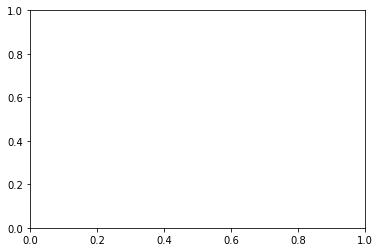

In [ ]:
##Adams-Moulton 
t3,t2,t1,t,t_1,yj31,yj21,yj1,y1j,y_j1,yj32,yj22,yj12,y2j,y_j2= symbols('t3,t2,t1,t,t_1,yj31,yj21,yj1,y1j,y_j1,yj32,yj22,yj12,y2j,y_j2')
def Amoulton(f1,f2,s1,s2,a,b,y10,y20,M):
  h = (b-a)/M
  Ys1= np.zeros(M+1)
  Ys2= np.zeros(M+1)
  Error11=np.zeros(M+1)
  Error22=np.zeros(M+1)
  X, Y1r,Y2r = RK45(func, func2, a, b, y10, y20, M, 4)
  Ys1[0:4]= Y1r[0:4]
  Ys2[0:4]= Y2r[0:4]
  X[0] = a

  fx2= y_j2-y2j-(h/720)*(-19*f2(t3,yj31,yj32)+106*f2(t2,yj21,yj22)-264*f2(t1,yj1,yj12)+646*f2(t,y1j,y2j)+251*f2(t_1,y_j1,y_j2))
  fx2= solve(fx2,y_j2)[0]
    
  fx1= y_j1-y1j-(h/720)*(-19*f1(t3,yj31,yj32)+106*f1(t2,yj21,yj22)-264*f1(t1,yj1,yj12)+646*f1(t,y1j,y2j)+251*f1(t_1,y_j1,y_j2))
  fx1= solve(fx1.subs(y_j2,fx2),y_j1)[0]

  i=3
  while i<M:
    Ys1[i+1]= fx1.subs(t3,X[i-3]).subs(t2,X[i-2]).subs(t1,X[i-1]).subs(t,X[i]).subs(t_1,X[i+1]).subs(yj32,Ys2[i-3]).subs(yj31,Ys1[i-3]).subs(yj22,Ys2[i-2]).subs(yj21,Ys1[i-2]).subs(yj12,Ys2[i-1]).subs(yj1,Ys1[i-1]).subs(y2j,Ys2[i]).subs(y1j,Ys1[i])
    Ys2[i+1]= fx2.subs(t3,X[i-3]).subs(t2,X[i-2]).subs(t1,X[i-1]).subs(t,X[i]).subs(t_1,X[i+1]).subs(yj32,Ys2[i-3]).subs(yj31,Ys1[i-3]).subs(yj22,Ys2[i-2]).subs(yj21,Ys1[i-2]).subs(yj12,Ys2[i-1]).subs(yj1,Ys1[i-1]).subs(y_j1,Ys1[i+1]).subs(y2j,Ys2[i]).subs(y1j,Ys1[i])
    i=i+1
  
  return X, Ys1, Ys2
'''    
  e1,e2=[]
  for i in range(M+1):
    print(Ys1[i])
    print(sol1(X[i]))
    e1.append(abs(Ys1[i]-sol1(X[i])))
    e2.append(abs(Ys2[i]-sol2(X[i])))

  print(tabulate({'x': x, 'y1': ya1,'Error y1':e1,'y2': ya2,'Error y2':e2 }, headers="keys", tablefmt='fancy_grid'))
'''
  

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
plt.plot(X,real1,'b', label='Exacta')

plt.plot(x1,y11,'g', label='h=1/2')

plt.plot(x2,y12,'r', label='h=1/4')
plt.plot(x3,y13,'c', label='h=1/8')
plt.plot(x4,y14,'m', label='h=1/16')
plt.plot(x5,y15,'y', label='h=1/32')
plt.plot(x6,y16,'k', label='h=1/64')
plt.ylim(0,2)
plt.legend(loc='upper right')
plt.show()
  
  

Amoulton(func, func2, sol1, sol2, 0,1,4/3, 2/3,2)

In [ ]:
x = np.linspace(0,1,1000)
real1 = np.zeros(len(x))
real2 = np.zeros(len(x))
for i in range(len(x)):
  real1[i] = sol1(x[i])
  real2[i] = sol2(x[i])



x1,y11,y21=AMoulton(func,func2,0,1,2,(4/3),(2/3))
x2,y12,y22=AMoulton(func,func2,0,1,4,(4/3),(2/3))
x3,y13,y23=AMoulton(func,func2,0,1,8,(4/3),(2/3))
x4,y14,y24=AMoulton(func,func2,0,1,16,(4/3),(2/3))
x5,y15,y25=AMoulton(func,func2,0,1,32,(4/3),(2/3))
x6,y16,y26=AMoulton(func,func2,0,1,64,(4/3),(2/3))



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,real2, 'b', label='Exacta')
plt.plot(x1,y21, 'g', label='h=1/2')
plt.plot(x2,y22, 'r', label='h=1/4')
plt.plot(x3,y23, 'c', label='h=1/8')
plt.plot(x4,y24, 'm', label='h=1/16')
plt.plot(x5,y25, 'y', label='h=1/32')
plt.plot(x6,y26, 'k', label='h=1/64')
plt.ylim(top = 1, bottom = -2)
plt.legend(loc='upper rigth')
# show the plot
plt.show()

In [ ]:
##Diferencias finitas
def DFinitas(a,b,u0,un,e,M):
  h= (b-a)/M
  X= np.zeros(M+1)
  X[0]=a

  for i in range(M):
    X[i+1]= X[i]+h
  print(X)

DFinitas(0,1,1,3,0.01,5)

[0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
##Diferencias finitas
##DIFERENCIAS FINITAS EDO
def DFinitas(a,b,u0,un,ep,M):
  h=(b-a)/M
  X=np.zeros(M+1)
  A=np.zeros((M-1,M-1))
  c=np.zeros(M-1)
  d=np.zeros(M-1)
  de=np.zeros(M-2)
  db=np.zeros(M-2)
  ljj= -2
  ljj_1= 1-(h/(2*ep)) 
  lj1j= 1+(h/(2*ep))
  fj= -(h**2/ep)
  X[0]=a
  c[0]= fj-lj1j
  c[M-2]=fj-3*ljj_1
  c[1:M-2]= fj
  U=np.zeros(M+1)
  U[0]=u0
  U[M]=un

  for i in range(M-1):
    d[i]= ljj
  for j in range(M-2):
    de[j]= ljj_1
    db[j]= lj1j
  for i in range(M):
    X[i+1]= X[i]+h

  Error = np.zeros(M+1)
  Datos = []
  matriz= np.diag(d) + np.diag(de, 1) + np.diag(db, -1)
  d= np.linalg.solve(matriz,c)
  for i in range(M-1):
    U[i+1]=d[i]
  for i in range(M+1):
    Error[i] = abs(U[i]-sol3(X[i],ep))
    Datos.append([X[i],U[i],Error[i], sol3(X[i],ep)])
  Datos = pd.DataFrame(Datos).set_axis(['X','U aprox','Error', 'U'], axis=1)
  return X, U

DFinitas(0,1,1,3,0.01,4)


(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([ 1.        , -1.16792528,  1.92050874, -1.16156598,  3.        ]))

In [ ]:
def finitas(a,b,u0,un,ep,M):
  h=(b-a)/M
  X=np.zeros(M+1)
  A=np.zeros((M-1,M-1))
  c=np.zeros(M-1)
  d=np.zeros(M-1)
  de=np.zeros(M-2)
  db=np.zeros(M-2)
  ljj= -2
  ljj_1= 1-(h/(2*ep)) 
  lj1j= 1+(h/(2*ep))
  fj= -(h**2/ep)
  X[0]=a
  c[0]= fj-lj1j
  c[M-2]=fj-3*ljj_1
  c[1:M-2]= fj
  U=np.zeros(M+1)
  U[0]=u0
  U[M]=un

  for i in range(M-1):
    d[i]= ljj
  for j in range(M-2):
    de[j]= ljj_1
    db[j]= lj1j
  for i in range(M):
    X[i+1]= X[i]+h
    l= sol3(X[i],ep)

  matriz= np.diag(d) + np.diag(de, 1) + np.diag(db, -1)
  d= np.linalg.solve(matriz,c)
  for i in range(M-1):
    U[i+1]=d[i]
  return X,U
finitas(0,1,1,3,0.1,2)

(array([0. , 0.5, 1. ]), array([ 1., -1.,  3.]))